# **Breast Cancer Prediction**

In [1]:
# Installing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# importinig the dataset
from sklearn import datasets

In [3]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [4]:
# Load the breast cancer dataset
data = datasets.load_breast_cancer()

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
X = data["data"]

In [7]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
X.shape

(569, 30)

In [9]:
y = data["target"]

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
y.shape

(569,)

In [12]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [13]:
# Initialize a dictionary to store the accuracy scores
results = {}

In [14]:
# Logistic Regression
def LogisticRegression(X_train, y_train, X_test):
    # Initialize model
    from sklearn.linear_model import LogisticRegression
    lr_model = LogisticRegression(max_iter = 10000)

    # fitting the data
    lr_model = lr_model.fit(X_train, y_train)
    
    # make predictions
    predictions = lr_model.predict(X_test)
    return predictions



In [15]:
results["Logistic Regression"] = accuracy_score(y_test, LogisticRegression(X_train, y_train, X_test))

In [16]:
print(classification_report(y_test, LogisticRegression(X_train, y_train, X_test)))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [17]:
print(confusion_matrix(y_test, LogisticRegression(X_train, y_train, X_test)))

[[ 57   6]
 [  3 105]]


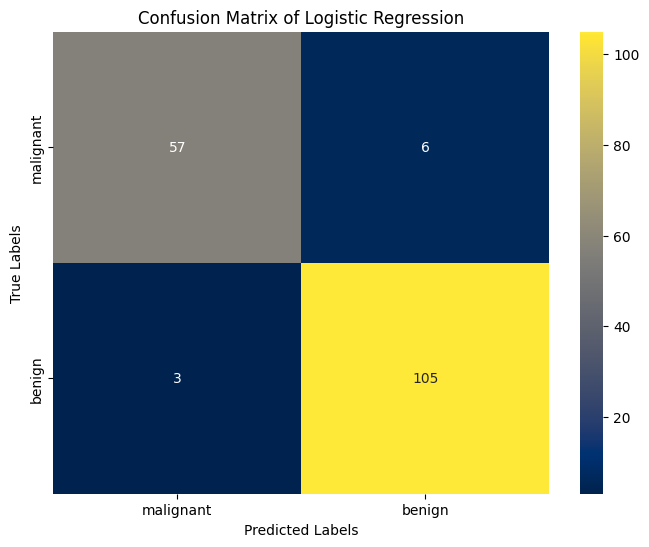

In [18]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, LogisticRegression(X_train, y_train, X_test)), annot = True, fmt = "d", cmap = "cividis", xticklabels = data.target_names, yticklabels = data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [19]:
# Decision Tree
def DecisionTree(X_train, y_train, X_test):
    # Initialize model
    from sklearn.tree import DecisionTreeClassifier
    dt_model = DecisionTreeClassifier()

    # fitting the data
    dt_model = dt_model.fit(X_train, y_train)
    
    # make predictions
    predictions = dt_model.predict(X_test)
    return predictions

In [20]:
results["Decision Tree"] = accuracy_score(y_test, DecisionTree(X_train, y_train, X_test))

In [21]:
print(classification_report(y_test, DecisionTree(X_train, y_train, X_test)))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        63
           1       0.94      0.99      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [22]:
print(confusion_matrix(y_test, DecisionTree(X_train, y_train, X_test)))

[[ 53  10]
 [  4 104]]


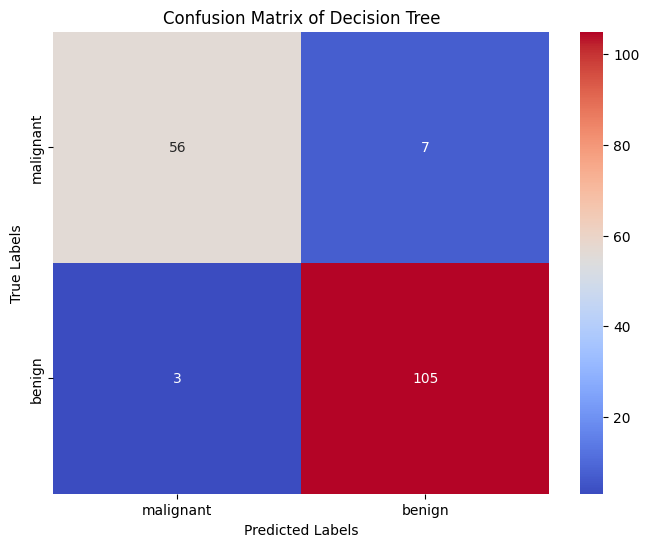

In [23]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, DecisionTree(X_train, y_train, X_test)), annot = True, fmt = "d", cmap = "coolwarm", xticklabels = data.target_names, yticklabels = data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Decision Tree")
plt.show()

In [24]:
# Random Forest
def RandomForest(X_train, y_train, X_test):
    # Initialize model
    from sklearn.ensemble import RandomForestClassifier
    rf_model = RandomForestClassifier(n_estimators = 100)

    # fitting the data
    rf_model = rf_model.fit(X_train, y_train)
    
    # make predictions
    predictions = rf_model.predict(X_test)
    return predictions

In [25]:
results["Random Forest"] = accuracy_score(y_test, RandomForest(X_train, y_train, X_test))

In [26]:
print(classification_report(y_test, RandomForest(X_train, y_train, X_test)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [27]:
print(confusion_matrix(y_test, RandomForest(X_train, y_train, X_test)))

[[ 58   5]
 [  4 104]]


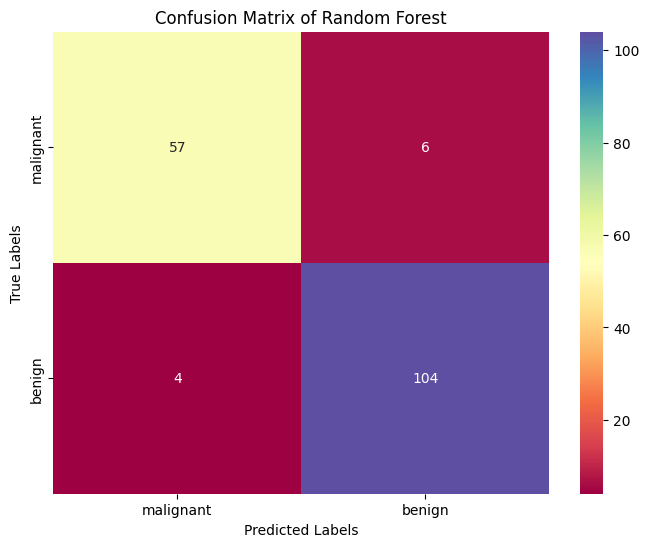

In [31]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, RandomForest(X_train, y_train, X_test)), annot = True, fmt = "d", cmap = "Spectral", xticklabels = data.target_names, yticklabels = data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Random Forest")
plt.show()

In [32]:
# KNN
def KNN(X_train, y_train, X_test):
    # Initialize model
    from sklearn.neighbors import KNeighborsClassifier
    knn_model = KNeighborsClassifier()

    # fitiing the data
    knn_model = knn_model.fit(X_train, y_train)
    
    # make predictions
    predictions = knn_model.predict(X_test)
    return predictions

In [33]:
results["K Nearest Neighbours"] = accuracy_score(y_test, KNN(X_train, y_train, X_test))

In [34]:
print(classification_report(y_test, KNN(X_train, y_train, X_test)))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        63
           1       0.94      0.95      0.94       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [35]:
print(confusion_matrix(y_test, KNN(X_train, y_train, X_test)))

[[ 56   7]
 [  5 103]]


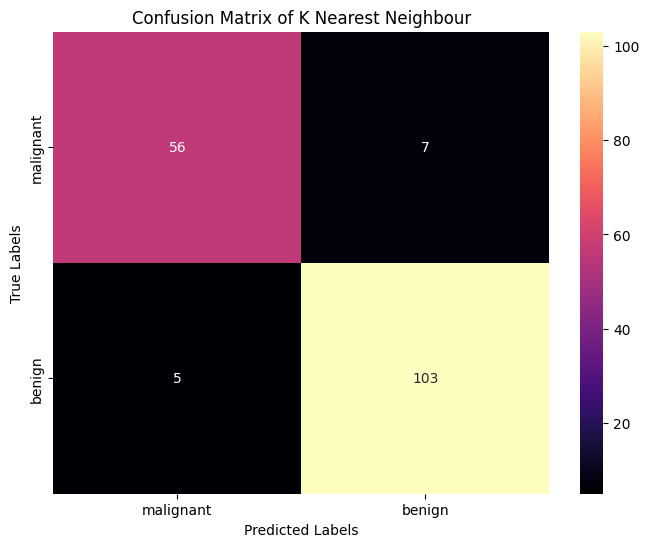

In [36]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, KNN(X_train, y_train, X_test)), annot = True, fmt = "d", cmap = "magma", xticklabels = data.target_names, yticklabels = data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of K Nearest Neighbour")
plt.show()

In [37]:
results

{'Logistic Regression': 0.9473684210526315,
 'Decision Tree': 0.9415204678362573,
 'Random Forest': 0.9590643274853801,
 'K Nearest Neighbours': 0.9298245614035088}

In [38]:
results = dict(sorted(results.items(), key = lambda item: item[1], reverse = True))

In [39]:
results

{'Random Forest': 0.9590643274853801,
 'Logistic Regression': 0.9473684210526315,
 'Decision Tree': 0.9415204678362573,
 'K Nearest Neighbours': 0.9298245614035088}

In [40]:
for model_name, score in results.items():
    print(f"{model_name} : {score :.2f}")

Random Forest : 0.96
Logistic Regression : 0.95
Decision Tree : 0.94
K Nearest Neighbours : 0.93
